# Project on Data Exploration and Summary

In [ ]:
#Hello Everyone
#This is Umang!
# I am going to explore this dataset as a part of my Task in Internship with Happieloop

In [2]:
#Importing pandas directly was showing error of 'Module not found'
!pip install pandas

In [3]:
!pip install scipy

In [4]:

import pandas as pd
import numpy as np
import scipy
from scipy import stats
from scipy.stats import norm

In [5]:
!pip install matplotlib

In [6]:
import matplotlib. pyplot as plt
%matplotlib inline

In [62]:
!pip install seaborn

In [63]:
import seaborn as sns

In [96]:
!pip install scikit-learn

In [102]:
import sklearn

# Understanding Data

In [7]:
#Importing Raw data, that we uploaded in our jupiter notebook
db = pd.read_csv(r"C:\Users\umang\Desktop\laptops_train.csv")

In [36]:
#To obtain few top rows and check the heads of our data
db.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [12]:
db.tail()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
972,Dell,Alienware 17,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,10,4.42kg,24897600.0
973,Toshiba,Tecra A40-C-1DF,Notebook,"14.0""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows,10,1.95kg,10492560.0
974,Asus,Rog Strix,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,10,2.73kg,18227710.8
975,HP,Probook 450,Notebook,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows,10,2.04kg,8705268.0
976,Lenovo,ThinkPad T460,Notebook,"14.0""",1366x768,Intel Core i5 6200U 2.3GHz,4GB,508GB Hybrid,Intel HD Graphics 520,Windows,7,1.70kg,8909784.0


In [9]:
#Lets attract some more basic details of our data in order to study it
db.shape

(977, 13)

In [10]:
db.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', 'Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price'],
      dtype='object')

In [11]:
db.describe()

,Price
count,9.770000e+02
mean,1.001899e+07
std,6.306430e+06
min,1.706375e+06
25%,5.326308e+06
50%,8.527428e+06
75%,1.311570e+07
max,5.423231e+07


In [14]:
db.nunique()

Manufacturer                 19
Model Name                  488
Category                      6
Screen Size                  18
Screen                       38
CPU                         106
RAM                           8
Storage                      36
GPU                          98
Operating System              7
Operating System Version      4
Weight                      166
Price                       639
dtype: int64

In [16]:
db['Manufacturer'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [17]:
db['Category'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [25]:
db['Operating System'].unique()

array(['macOS', 'No OS', 'Windows', 'Mac OS', 'Linux', 'Android',
       'Chrome OS'], dtype=object)

# Cleaning Data

In [21]:
db.isnull().sum()

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
Storage                       0
GPU                           0
Operating System              0
Operating System Version    136
Weight                        0
Price                         0
dtype: int64

In [30]:
# We wont be using operating system version much in our analysis and will be ignoring the null value and move forward

In [79]:
# Lets drop column GPU as well as model name we won't be needing it in our analysis
db.drop(['GPU','Model Name','CPU','Screen','Storage'], axis = 1, inplace = True)

In [71]:
#we check data types and fix and convert to int and float to minimize data according to situations
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Category                  977 non-null    object 
 2   Screen Size               977 non-null    float64
 3   Screen                    977 non-null    object 
 4   CPU                       977 non-null    object 
 5   RAM                       977 non-null    float64
 6   Storage                   977 non-null    object 
 7   Operating System          977 non-null    object 
 8   Operating System Version  841 non-null    object 
 9   Weight                    977 non-null    float64
 10  Price                     977 non-null    float64
dtypes: float64(4), object(7)
memory usage: 84.1+ KB


In [68]:
# we want to remove that inches sign in screen size
db ['Screen Size'] = db['Screen Size'].str.replace('"','').astype(float)

In [67]:
# remove the kg from weight
db ['Weight'] = db['Weight'].str.replace('kg','').astype(float)

In [69]:
# remove the GB from RAM
db['RAM'] = db['RAM'].str.replace('GB','').astype(float)

In [92]:
#Assigning values to categorical variables
#print all unique values that are in categorical features
for col in db.select_dtypes(include=['object']).columns:
    print(f'{col}: {db[col].unique()}')

Manufacturer: ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
Category: ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
Operating System: ['macOS' 'No OS' 'Windows' 'Mac OS' 'Linux' 'Android' 'Chrome OS']
Operating System Version: [nan '10' 'X' '10 S' '7']


In [104]:
#encoded all values by labelencoder
from sklearn import preprocessing
for col in db.select_dtypes(include=['object']).columns:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(db[col].unique())
    db[col] = label_encoder.transform(db[col])
    print(f'{col} : {db[col].unique()}')

Manufacturer : [ 1  7  0  2  4 10  3 11 13 16  8 18 17 14 12 15  6  5  9]
Category : [4 3 2 1 0 5]
Operating System : [6 4 5 3 2 0 1]
Operating System Version : [4 0 3 1 2]


# Data Visualization

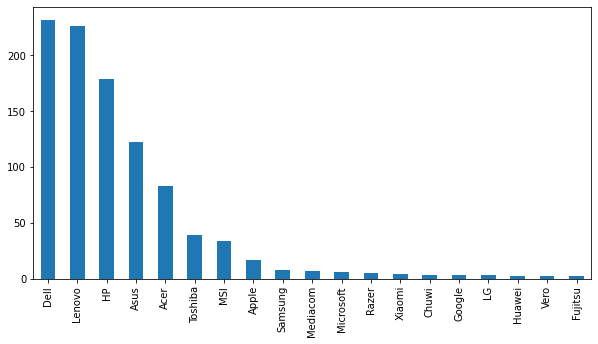

In [54]:
#Different Manufacturer Counts
plt.figure(figsize=(10,5))
db['Manufacturer'].value_counts().plot(kind='bar')
plt.show()

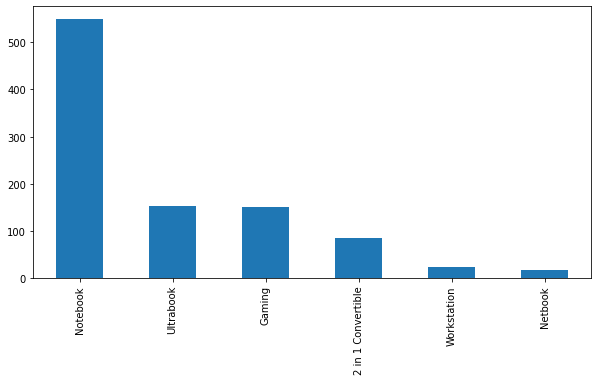

In [55]:
#Different Category Counts
plt.figure(figsize=(10,5))
db['Category'].value_counts().plot(kind='bar')
plt.show()

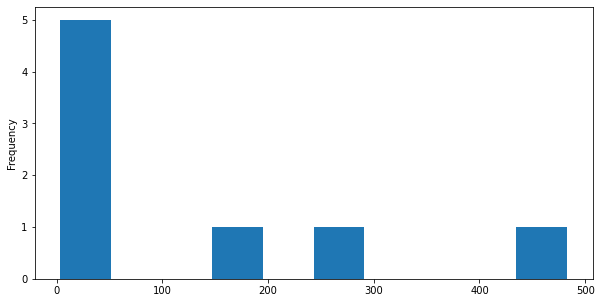

In [57]:
#Different RAM counts
plt.figure(figsize=(10,5))
db['RAM'].value_counts().plot(kind='hist')
plt.show()

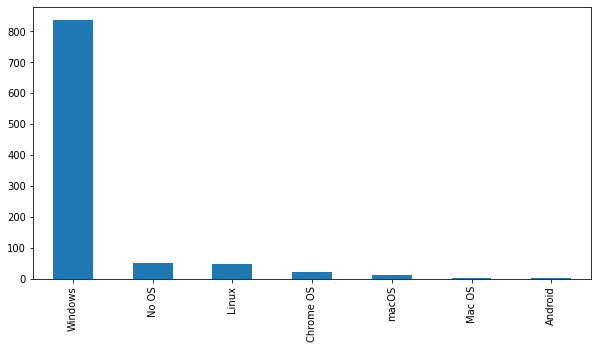

In [58]:
#Different Operating System Counts
plt.figure(figsize=(10,5))
db['Operating System'].value_counts().plot(kind='bar')
plt.show()

In [105]:
#correlation 
correlation = db.corr()

<AxesSubplot:>

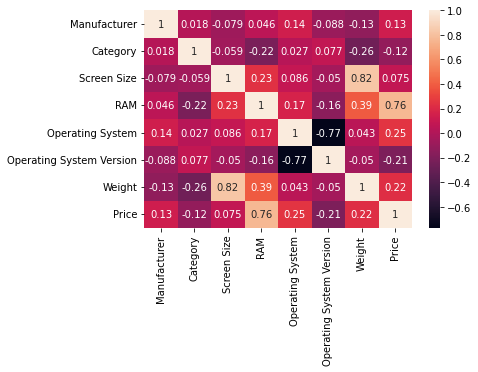

In [106]:
#creating a correlation heatmap
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot = True)

# Documentation

In [ ]:
# This dataset shows the pricing of different laptops and the factors that are considered while deciding the prices
#it could be the Model, the Category, the manufacturer, the screen size, the RAM, the operating system, the version 
#of operating system and can also be the weight

In [ ]:
# we conclude the following:
#1. Price of laptop is highly positively correlated with the RAM of the laptop offered, higher the RAM higher the price
#2. Price of laptop is moderaley correlated with Manufacturer, Screen Size, Operating System, and Weight
#3. Price of laptop is negatively correlated with Category and Operating System version
#4. We also see that weight of the laptop is highly correlated with the size of the screen